# Random Forest Feature Importance
As a side-effect of buiding a random forest ensemble, we get a very useful estimate of feature importance. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
%matplotlib inline

### Segmentation Data

In [2]:
seg_data = pd.read_csv('segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [3]:
seg_data['Class'].value_counts()

FOLIAGE      330
GRASS        330
WINDOW       330
CEMENT       330
BRICKFACE    330
SKY          330
PATH         330
Name: Class, dtype: int64

Load the data, scale it and divide into train and test sets.  
The filters are *trained* using the training data and then a classifier is trained on the feature subset and tested on the test set. 

In [4]:
y = seg_data.pop('Class').values
X_raw = seg_data.values

X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, 
                                                       random_state=1, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

feature_names = seg_data.columns
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

Build the Random Forest and calculate the scores.  

In [5]:
n_trees = 1000
RF = RandomForestClassifier(n_estimators=n_trees, max_depth=2, random_state=0)
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=0)

In [6]:
rf_scores = RF.feature_importances_
rf_scores

array([1.76612882e-05, 8.49959482e-02, 0.00000000e+00, 0.00000000e+00,
       5.25313302e-05, 9.72033830e-04, 5.03871745e-04, 1.83372967e-03,
       1.94395702e-03, 1.09126358e-01, 1.04299553e-01, 1.14757126e-01,
       9.75590795e-02, 1.59718999e-02, 5.59803095e-02, 1.29421180e-01,
       1.08805272e-01, 2.02978532e-02, 1.53461636e-01])

Calculate the I-gain scores for comparison.

In [7]:
i_scores = mutual_info_classif(X_train,y_train)
i_scores
# The i-gain scores for the features

array([0.14284501, 0.9499235 , 0.01721937, 0.03998458, 0.03879764,
       0.49688052, 0.31817588, 0.45298667, 0.35928424, 1.15392596,
       1.22050455, 1.10053886, 1.12775275, 0.77544303, 0.91526045,
       0.97033459, 1.13577538, 0.93238526, 1.13153387])

In [8]:
df=pd.DataFrame({'Mutual Info.':i_scores,'RF Score':rf_scores,'Feature':feature_names})
df.set_index('Feature', inplace = True)
df.sort_values('Mutual Info.', inplace = True, ascending = False)
df

,Mutual Info.,RF Score
Feature,,
RAWRED-MEAN,1.220505,0.104300
INTENSITY-MEAN,1.153926,0.109126
VALUE-MEAN,1.135775,0.108805
HUE-MEAN,1.131534,0.153462
RAWGREEN-MEAN,1.127753,0.097559
RAWBLUE-MEAN,1.100539,0.114757
EXGREEN-MEAN,0.970335,0.129421
REGION-CENTROID-ROW,0.949923,0.084996
SATURATION-MEAN,0.932385,0.020298


Plotting the two sets of scores

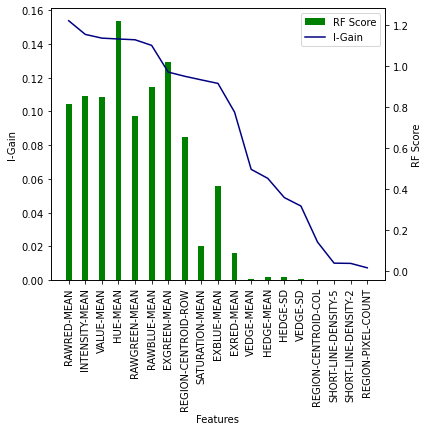

In [9]:
n = len(df.index)
rr = range(0,n)
fig, ax = plt.subplots(figsize=(6,5))
ax2 = ax.twinx()
ax.bar(df.index, df["RF Score"], label='RF Score',width=.35, color = 'g')

ax2.set_xticks(rr)
ax2.plot(df.index, df["Mutual Info."], label='I-Gain', color = 'navy')

ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('RF Score')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.show()

In [10]:
from scipy import stats
stats.spearmanr(rf_scores, i_scores)

SpearmanrResult(correlation=0.9144362442396954, pvalue=4.331228025158048e-08)

## Penguins

In [11]:
penguins_df = pd.read_csv('penguins.csv', index_col = 0)

feature_names = penguins_df.columns
print(penguins_df.shape)
penguins_df.head()

(333, 5)


,bill_length,bill_depth,flipper_length,body_mass,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
3,36.7,19.3,193.0,3450.0,Adelie
4,39.3,20.6,190.0,3650.0,Adelie


In [12]:
y = penguins_df.pop('species').values
X = penguins_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       random_state=1, test_size=1/2)
feature_names = penguins_df.columns
X_train.shape, X_test.shape

((166, 4), (167, 4))

In [13]:
RF = RandomForestClassifier(n_estimators=n_trees, max_depth=2, random_state=0)
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=0)

In [14]:
rf_scores = RF.feature_importances_
rf_scores

array([0.3394659 , 0.11442273, 0.4071822 , 0.13892917])

In [15]:
feature_names

Index(['bill_length', 'bill_depth', 'flipper_length', 'body_mass'], dtype='object')

In [16]:
i_scores = mutual_info_classif(X_train,y_train)
i_scores
# The i-gain scores for the features

array([0.63904367, 0.50143776, 0.61236394, 0.54638431])

In [17]:
pen_df=pd.DataFrame({'Mutual Info.':i_scores,'RF Score':rf_scores,'Feature':feature_names})
pen_df.set_index('Feature', inplace = True)
pen_df.sort_values('Mutual Info.', inplace = True, ascending = False)
pen_df

,Mutual Info.,RF Score
Feature,,
bill_length,0.639044,0.339466
flipper_length,0.612364,0.407182
body_mass,0.546384,0.138929
bill_depth,0.501438,0.114423


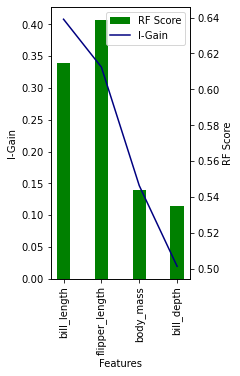

In [18]:
n = len(pen_df.index)
rr = range(0,n)
fig, ax = plt.subplots(figsize=(2.5,5))
ax2 = ax.twinx()
ax.bar(pen_df.index, pen_df["RF Score"], label='RF Score',width=.35, color = 'g')

ax2.set_xticks(rr)
ax2.plot(pen_df.index, pen_df["Mutual Info."], label='I-Gain', color = 'navy')

ax.set_xticklabels(list(pen_df.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('RF Score')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.show()

In [19]:
stats.spearmanr(rf_scores, i_scores)

SpearmanrResult(correlation=0.7999999999999999, pvalue=0.20000000000000007)